#### Author: Ashley Eastman
##### Spring 2023 - Customer Churn Prediction Analysis


In [1]:
# Libraries
# General
import pandas as pd
import numpy as np 

# ML
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder

# Viz
import matplotlib.pyplot as plt
from importlib import *
import plotly.express as px
import matplotlib.patches as patches

#### This dataset includes information about cellphone company customers and whether they stayed or left the company (churn)
##### Note: Data Cleaning has been performed prior to this step

In [2]:
# Dataset: customerchurn.csv
churn = pd.read_csv("customerchurn.csv")
churn.info()
churn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7032 non-null   int64  
 1   MonthlyCharges   7032 non-null   float64
 2   SeniorCitizen    7032 non-null   int64  
 3   PaymentMethod    7032 non-null   object 
 4   InternetService  7032 non-null   object 
 5   tenure           7032 non-null   int64  
 6   Contract         7032 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 384.7+ KB


,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
0,0,29.85,0,Electronic check,DSL,1,Month-to-month
1,0,56.95,0,Mailed check,DSL,34,One year
2,1,53.85,0,Mailed check,DSL,2,Month-to-month
3,0,42.30,0,Bank transfer,DSL,45,One year
4,1,70.70,0,Electronic check,Fiber optic,2,Month-to-month
...,...,...,...,...,...,...,...
7027,0,84.80,0,Mailed check,DSL,24,One year
7028,0,103.20,0,Credit card,Fiber optic,72,One year
7029,0,29.60,0,Electronic check,DSL,11,Month-to-month
7030,1,74.40,1,Mailed check,Fiber optic,4,Month-to-month


In [3]:
# Dependent variable: Churn 0 (no churn) or 1 (churn)
# Independent variables: 6 
X = churn.drop(['Churn'], axis=1)
y = churn['Churn']
print(X.shape), print(y.shape)

(7032, 6)
(7032,)


(None, None)

### EDA

Null values in each col:
 Churn              0
MonthlyCharges     0
SeniorCitizen      0
PaymentMethod      0
InternetService    0
tenure             0
Contract           0
dtype: int64


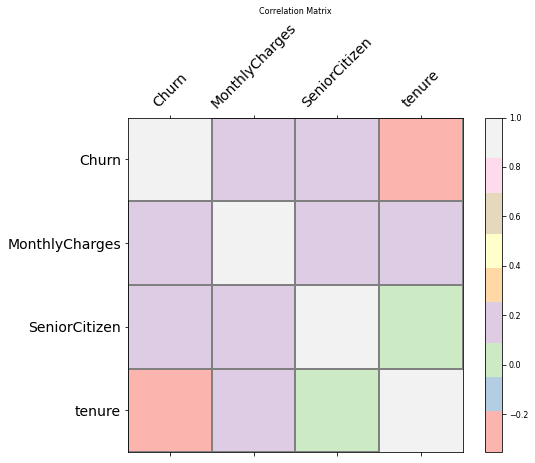

In [4]:
# some EDA

# Null value check
nullvals = churn.isnull().sum()
print('Null values in each col:\n', nullvals)


f = plt.figure(figsize=(8, 6))
# Creating a gradient colormap based on 'Pastel1'
pastel1 = plt.get_cmap('Pastel1')
n = len(churn.columns)
gradient_colors = pastel1(np.linspace(0, 1, n**2))

# Create a new colormap from the gradient colors
gradient_cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list('pastel1_gradient', gradient_colors, n**2)

plt.matshow(churn.corr(), fignum=f.number, cmap=gradient_cmap)
plt.xticks(range(churn.select_dtypes(['number']).shape[1]), churn.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(churn.select_dtypes(['number']).shape[1]), churn.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)

# Black Borders
for i in range(len(churn.corr())):
    for j in range(len(churn.corr())):
        if i != j:
            plt.gca().add_patch(patches.Rectangle((i - 0.5, j - 0.5), 1, 1, fill=False, edgecolor='gray', lw=2))
            
plt.title('Correlation Matrix', fontsize=8)
plt.show()

/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


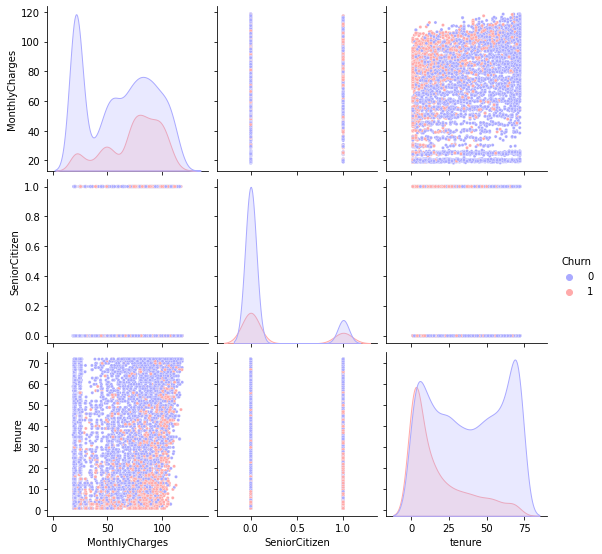

In [5]:
# Using seaborn to plot scatter plot for continuous variables
import seaborn as sns
sns.pairplot(churn, diag_kind='kde', height=2.6, hue='Churn', palette='bwr', plot_kws=dict(s=10))

In [6]:
color_map = {1: '#FFB3B3', 0: '#D2DAFF'}
fig = px.histogram(churn, x="Churn", color="SeniorCitizen", title="<b>Distribution Chart of Senior Citizens & Churn Rate</b>", color_discrete_map=color_map)
fig.update_layout(width=500, height=400, bargap=0.1)
fig.update_traces(marker_line_color='gray', marker_line_width=1.5)

fig.show()

In [7]:
senior_churn = churn[churn['SeniorCitizen'] == 1] 
senior = senior_churn['Churn'].value_counts()
senior[1] / (senior[0] + senior[1])
seniorYes = senior_churn[senior_churn['Churn'] == 1]
seniorNo = senior_churn[senior_churn['Churn'] == 0]
total = len(seniorYes) / (len(seniorYes) + len(seniorNo))
print('In total, approximately: ', round(total, 2) * 100, ' % of senior citizens churned')


In total, approximately:  42.0  % of senior citizens churned


In [8]:
show = churn[churn['Churn'] == 1]
seniorchurn = show[show['SeniorCitizen'] == 1]
seniorchurn

,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
20,1,39.65,1,Electronic check,DSL,1,Month-to-month
53,1,80.65,1,Credit card,Fiber optic,8,Month-to-month
55,1,95.45,1,Electronic check,Fiber optic,18,Month-to-month
99,1,98.50,1,Electronic check,Fiber optic,25,Month-to-month
113,1,76.50,1,Electronic check,Fiber optic,37,Month-to-month
...,...,...,...,...,...,...,...
6982,1,88.05,1,Electronic check,Fiber optic,50,Month-to-month
6997,1,75.05,1,Credit card,Fiber optic,3,Month-to-month
6999,1,74.45,1,Electronic check,Fiber optic,1,Month-to-month
7021,1,75.75,1,Electronic check,Fiber optic,1,Month-to-month


#### Notes on above EDA:
- We can see that monthly charges are not a huge identifier of a customer churning or not - as we have many customers with high monthly charges that have not churned. 
- Of the 1,393 customers that churned, 476 of them were senior citizens. 
- Of the 1,142 seniors in the dataset, 476 of them churned which is a very high churn rate for senior citizens. (41%)
- Tenure has a negative correlation with churn as we can also see from both the correlation matrix above & our pairplot
- When Tenure is low, and monthly charges are high, we can visually identify a high churn rate


In [9]:
# Splitting train/test
train, test = train_test_split(churn, test_size=0.3, random_state=42)
train.shape, test.shape

((4922, 7), (2110, 7))

##### Baseline Accuracy - Predict the most common output feature 

In [10]:
baseline = y.value_counts()[0]/len(y)
print('Baseline Accuracy:', round(baseline, 3) * 100,'%')

Baseline Accuracy: 73.4 %


In [11]:
# Variable Selecting & model fitting
logreg = smf.logit(formula = 'Churn ~ MonthlyCharges + SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.421207
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.2725
Time:                        17:48:48   Log-Likelihood:                -2073.2
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6747      0.214     -3

##### Notes / Interpretation on Logit Regression Results:
- Our * p > |z| * value for payment method is large (0.265, 0.360) 
- So I am going to create a column that only includes Electronic Check as payment method as Credit card & mailed check can be contributing to high variance inflation factors and should therefore be removed for a better fit model.


In [12]:
# Remove PaymentMethod Credit Card & Payment Method Mailed check. 
# Create a new feature (dummy var) 
train2 = train.copy() 
train2['ElectronicCheck'] = (train2['PaymentMethod'] == 'Electronic check').astype('int64')
train2.drop(columns=['PaymentMethod'], inplace=True)

# Repeat for test set as well
test2 = test.copy() 
test2['ElectronicCheck'] = (test2['PaymentMethod'] == 'Electronic check').astype('int64')
test2.drop(columns=['PaymentMethod'], inplace=True)

test2.head()

,Churn,MonthlyCharges,SeniorCitizen,InternetService,tenure,Contract,ElectronicCheck
2476,0,25.00,1,No,61,Two year,0
6773,0,24.70,0,No,19,Month-to-month,0
6116,1,102.25,0,Fiber optic,13,Month-to-month,0
3047,0,55.05,0,DSL,37,Month-to-month,0
4092,0,29.45,0,DSL,6,Month-to-month,0


In [13]:
test2['ElectronicCheck'].value_counts()

0    1418
1     692
Name: ElectronicCheck, dtype: int64

In [14]:
logreg2 = smf.logit(formula = 'Churn ~ SeniorCitizen + ElectronicCheck + InternetService + tenure + Contract',
                       data = train2).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.421529
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4914
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.2719
Time:                        17:48:49   Log-Likelihood:                -2074.8
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.5498      0.085     -6.465     

Notes on above Logit Regression results:
- Now we can see that all of the p-values are close to 0 now and we can safely assess that we have dropped all unimportant variables from the dataset


#### Predicting Probability of Customer Churn & Deciding the threshold value
##### Below I have compared multiple thresholds to determine the optimal p* to reduce error rate in our predictor 
Side note: Using optimal bayes formula 


### Conditional Probability (optimal bayes) 

> Formula: *f(x) = P(Y = 1 | X = x)*

In [15]:
# 1. Predicting the probability of default
# y_prob will be a vector of probabilities that the customer will churn or not (1 or 0)
y_prob = logreg2.predict(test2)

# 2. Determining the optimal threshold of the default probability
## The threshold of high churn-risk and low churn-risk will be 0.333
## If p > 1/3, then we consider high churn-risk and should send a promotion to the customer or check in with them

# 3. Predicting the label
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)

# use P = 1/2 as the threshold
y_pred_2 = pd.Series([1 if x > 1/2 else 0 for x in y_prob], index=y_prob.index)

P value = 1/3

In [16]:
# Now we have our probabiltiy of default, I will construct a confusion matrix based on decision tree threshold we have computed 
# High churn risk > 0.333.
# or high churn risk

y_test = test2['Churn']

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm) 

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Classification Report: ', report)
print('Accuracy: ', acc)

Confusion Matrix : 
 [[1199  350]
 [ 145  416]]
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.77      0.83      1549
           1       0.54      0.74      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110

Accuracy:  0.7654028436018957


#### With our threshold at **P = 1/2**, we can see that recall has increased from *~77% -> ~89%* for predicting churn while f1-score has increased from 83% -> ~86%. So depending on if we care more about correctly identifying true positives or true negatives, vs incorrectly identifying them (false positives/false negatives) then we should use 1/2 as our optimal p-value threshold. 

In [17]:
# Finding optimial p value threshold for churn prediction
y_test2 = test2['Churn']

cm2 = confusion_matrix(y_test2, y_pred_2)
print("Confusion Matrix : \n", cm2) 

acc2 = accuracy_score(y_test2, y_pred_2)
report2 = classification_report(y_test2, y_pred_2)
print('Classification Report: ', report2)
print('Accuracy: ', acc2)

Confusion Matrix : 
 [[1382  167]
 [ 279  282]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Accuracy:  0.7886255924170616


#### Precision: 83%


The ROC curve plots the TPR and FPR for every break-even threshold p between 0.0 and 1.0

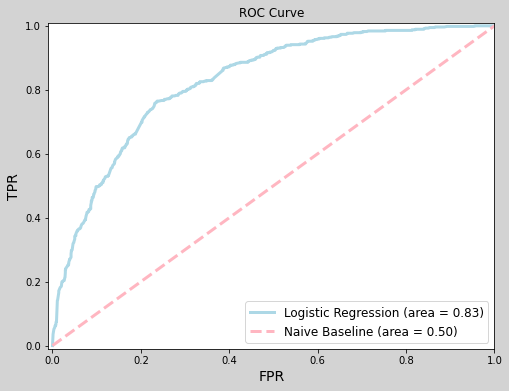

In [18]:
y_train = train2['Churn']
x_train = train2.drop(['Churn'], axis=1)

y_test = test2['Churn']
x_test = test2.drop(['Churn'], axis=1)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6), facecolor='lightgray')
plt.title('ROC Curve', fontsize=12)
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, color = 'lightblue', label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='lightpink', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=12)
plt.show()

#### LDA Model

In [19]:
# First I will change categorical variables to binary variables using OHE

# initialize the OneHotEncoder
drop_enc = OneHotEncoder(drop='first').fit(x_train[['InternetService','Contract']])
print(drop_enc.categories_)

[array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['Month-to-month', 'One year', 'Two year'], dtype=object)]


In [20]:
# Perform the transformation for both the training and the test set.

X_train_categorical = drop_enc.transform(x_train[['InternetService','Contract']]).toarray()
X_train_numerical = x_train[['MonthlyCharges','SeniorCitizen','tenure']].values
# combine the numerical variables and the one-hot encoded categorical variables
X_train_transformed = np.concatenate((X_train_numerical,X_train_categorical), axis = 1)

X_test_categorical = drop_enc.transform(x_test[['InternetService','Contract']]).toarray()
X_test_numerical = x_test[['MonthlyCharges','SeniorCitizen','tenure']].values
X_test_transformed = np.concatenate((X_test_numerical,X_test_categorical), axis = 1)

In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_transformed, y_train)

y_prob_lda = lda.predict_proba(X_test_transformed)
y_pred_lda = pd.Series([1 if x > 1/2 else 0 for x in y_prob_lda[:,1]], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[1365  184]
 [ 268  293]]

Accuracy: 0.785781990521327


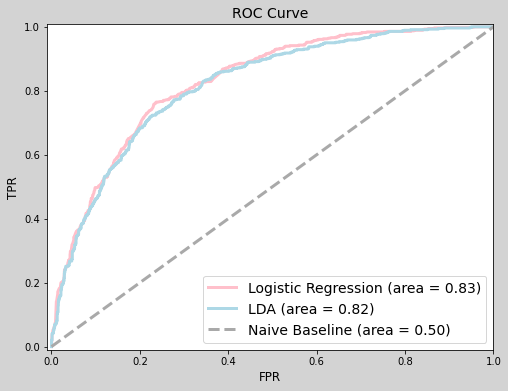

In [22]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda[:,1])
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(8, 6), facecolor='lightgray')
plt.title('ROC Curve', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, color = 'pink', label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot(fpr_lda, tpr_lda, color = 'lightblue', lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='darkgray', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

#### Feature Importance for LDA


In [23]:
from sklearn.ensemble import RandomForestClassifier

X_train_df = pd.DataFrame(X_train_transformed, columns=train2.columns)
X_test_df = pd.DataFrame(X_test_transformed, columns=test2.columns)


rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_transformed, y_train)
y_pred = rf.predict(X_test_transformed)
score = rf.score(X_test_transformed, y_test)
important_feats = pd.Series(rf.feature_importances_, index=X_train_df.columns).sort_values(ascending=False)
print(important_feats)

Churn              0.513605
SeniorCitizen      0.307479
InternetService    0.056721
ElectronicCheck    0.052663
Contract           0.034173
tenure             0.020344
MonthlyCharges     0.015014
dtype: float64


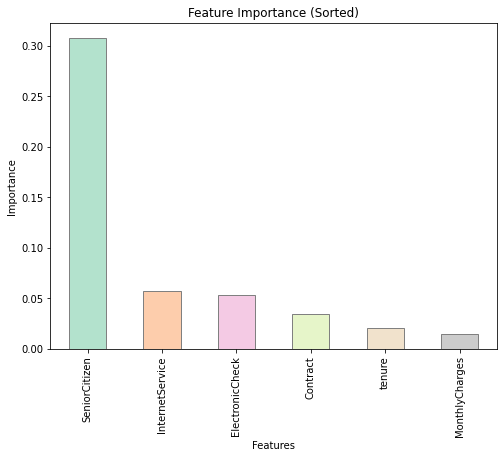

In [24]:
# Visualizing Feature Importance 
importances = rf.feature_importances_
weights = pd.Series(importances, index=X_train_df.columns)
weights = weights.drop(['Churn'])

# Sort the 'weights' Series in ascending order
weights_sorted = weights.sort_values(ascending=False)

# Generate a list of different colors for each bar
num_features = len(weights)
colors = plt.cm.Pastel2(np.linspace(0, 1, num_features))

# Now, create the sorted bar plot using the 'plot()' method and set the 'color' parameter
weights_sorted.plot(kind='bar', color=colors, edgecolor = 'gray', figsize=(8, 6))

# Optionally, you can add labels and title
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Sorted)')
plt.show()


#### Conclusion & Notes
- With the data that I have available, I have observed that our most important feature to determine churn rate is if the customer is a senior citizen or not (most senior citizens in this dataset churn)
- Lowered variance inflation factors by removing PaymentMethod Credit Card & Payment Method Mailed check for a more a better fit model with p values -> 0
- I minimized the error rate by finding the optimal p value threshold (1/2)
- With more data on the customers, a better accuracy rate and determination of churn rate factors can be determined. For example, if I had access to which platform the customers were using (app, mobile web) or more specifics on the types of services the customer used most, or even if they had dependents then we would be able and built a better model for determining churn 

#### Additional Notes on EDA:
- We can see that monthly charges are not a huge identifier of a customer churning or not - as we have many customers with high monthly charges that have not churned. 
- Of the 1,393 customers that churned, 476 of them were senior citizens. 
- Of the 1,142 seniors in the dataset, 476 of them churned which is a very high churn rate for senior citizens. (41%)
- Tenure has a negative correlation with churn as we can also see from both the correlation matrix above & our pairplot
- When Tenure is low, and monthly charges are high, we can visually identify a high churn rate

ashleyha@berkeley.edu